In [68]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x, y), _ = mnist.load_data()

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [72]:
print("x train shape:",x_train.shape)
print("y train shape:",y_train.shape)
print("x test shape:",x_test.shape)
print("y test shape:",y_test.shape)

x train shape: (42000, 28, 28)
y train shape: (42000,)
x test shape: (18000, 28, 28)
y test shape: (18000,)


In [74]:
y_train

array([1, 3, 1, ..., 1, 3, 3], dtype=uint8)

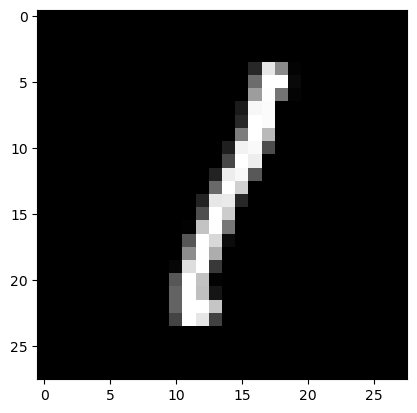

In [76]:
import matplotlib.pyplot as plt
image=x_train[0]
plt.imshow(image,cmap="gray")

In [78]:
x_train=x_train.reshape(x_train.shape[0],28*28)
x_test=x_train.reshape(x_train.shape[0],28*28)

In [80]:
x_train=x_train/255.0
x_test=x_test/255.0

In [82]:
print("x train shape:",x_train.shape)
print("x test shape:",x_test.shape)

x train shape: (42000, 784)
x test shape: (42000, 784)


In [84]:
x_train=x_train[:10000,:]
x_test=x_test[:2000,:]
y_train=y_train[:10000]
y_test=y_test[:2000]
print("x train shape:",x_train.shape)
print("x test shape:",x_test.shape)

x train shape: (10000, 784)
x test shape: (2000, 784)


In [86]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [104]:
pipe1= Pipeline(
    [('scaler',MinMaxScaler()),
    ('classifier',SVC(kernel="linear",C=1))]
)

pipe1.fit(x_train,y_train.ravel())

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', SVC(C=1, kernel='linear'))])

In [105]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(pipe1,x_train,y_train.ravel(),cv=2)
print("Accuracy:",acc.mean()*100)

Accuracy: 90.88000000000001


In [107]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
y_pred=pipe1.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.09      0.09      0.09       213
           1       0.12      0.11      0.12       236
           2       0.10      0.09      0.09       213
           3       0.10      0.09      0.09       224
           4       0.08      0.09      0.09       178
           5       0.10      0.09      0.09       190
           6       0.08      0.09      0.09       191
           7       0.13      0.12      0.13       200
           8       0.09      0.10      0.10       182
           9       0.08      0.09      0.08       173

    accuracy                           0.10      2000
   macro avg       0.10      0.10      0.10      2000
weighted avg       0.10      0.10      0.10      2000



<Axes: >

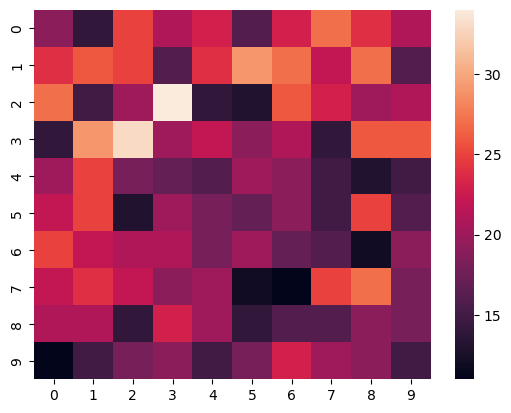

In [110]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm)

In [96]:
pipe2= Pipeline(
    [('scaler',MinMaxScaler()),
    ('classifier',SVC(kernel="rbf",gamma=0.1))]
)

pipe2.fit(x_train,y_train.ravel())

Pipeline(steps=[('scaler', MinMaxScaler()), ('classifier', SVC(gamma=0.1))])

In [112]:
acc=cross_val_score(pipe2,x_train,y_train.ravel(),cv=2)
print("Accuracy:",acc.mean()*100)

Accuracy: 85.96


In [114]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
y_pred=pipe2.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.09      0.09      0.09       213
           1       0.12      0.11      0.12       236
           2       0.10      0.09      0.09       213
           3       0.10      0.09      0.10       224
           4       0.09      0.09      0.09       178
           5       0.10      0.09      0.09       190
           6       0.08      0.09      0.09       191
           7       0.13      0.12      0.13       200
           8       0.09      0.10      0.10       182
           9       0.08      0.09      0.08       173

    accuracy                           0.10      2000
   macro avg       0.10      0.10      0.10      2000
weighted avg       0.10      0.10      0.10      2000



<Axes: >

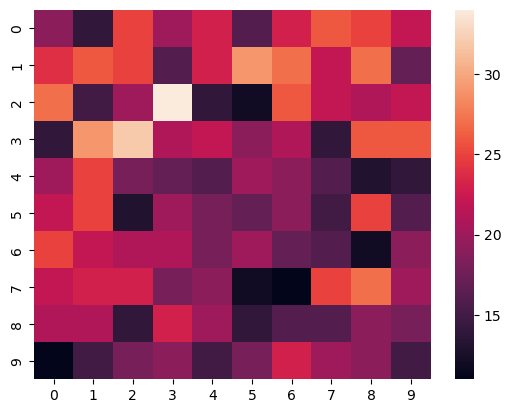

In [115]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm)

In [118]:
pipe= Pipeline(
    [('scaler',MinMaxScaler()),
    ('classifier',SVC())]
)

pipe.fit(x_train,y_train.ravel())

Pipeline(steps=[('scaler', MinMaxScaler()), ('classifier', SVC())])

In [142]:
from sklearn.model_selection import GridSearchCV
param = {
    'classifier__C': [1, 5, 10],
    'classifier__gamma': [0.001, 0.01, 0.1],
    'classifier__kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(pipe, param_grid=param, cv=3)
grid_search.fit(x_train, y_train)  # Make sure you use 'X_train' and 'y_train' correctly

print(grid_search.best_params_)

{'classifier__C': 10, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}


In [143]:
grid_search.best_score_

0.9611001892030835